In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.utils import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.optimizers import Adam


2023-05-31 13:15:09.437548: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = pd.read_csv('medium_data.csv')


In [3]:
dataset.head()


,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [4]:
dataset.shape


(6508, 10)

In [5]:
print("Number of records: ", dataset.shape[0])
print("Number of fields per record: ", dataset.shape[1])


Number of records:  6508
Number of fields per record:  10


In [6]:
df = dataset.copy()
df.head()


,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [7]:
df['title'].values


array(['A Beginner’s Guide to Word Embedding with Gensim Word2Vec\xa0Model',
       'Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric',
       'How to Use ggplot2 in\xa0Python', ...,
       'Content and Marketing Beyond Mass Consumption',
       '5 Questions All Copywriters Should Ask Clients Before Their Pen Hits the\xa0Paper',
       'How To Write a Good Business Blog\xa0Post'], dtype=object)

In [8]:
df.head()


,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [9]:
df['title'] = df['title'].apply(lambda x: x.replace(u'\xa0', u' '))
df['title'] = df['title'].apply(lambda x: x.replace('\u200a', ' '))


In [10]:
df['title'].values


array(['A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model',
       'Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric',
       'How to Use ggplot2 in Python', ...,
       'Content and Marketing Beyond Mass Consumption',
       '5 Questions All Copywriters Should Ask Clients Before Their Pen Hits the Paper',
       'How To Write a Good Business Blog Post'], dtype=object)

In [11]:
tokenizer = Tokenizer(oov_token='<oov>')

tokenizer.fit_on_texts(df['title'])


In [12]:
total_words = len(tokenizer.word_index)+1


In [13]:
print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])


Total number of words:  8238
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  8237


In [14]:
dic = dict(tokenizer.word_counts)
sorted(dic.items(), key=lambda x: x[1], reverse=True)


[('to', 1852),
 ('the', 1848),
 ('strong', 1363),
 ('a', 1349),
 ('of', 992),
 ('how', 933),
 ('and', 912),
 ('in', 818),
 ('your', 812),
 ('markup', 710),
 ('for', 702),
 ('you', 639),
 ('with', 514),
 ('is', 513),
 ('—', 453),
 ('data', 406),
 ('why', 365),
 ('class', 364),
 ('h3', 356),
 ('i', 324),
 ('what', 322),
 ('on', 302),
 ('learning', 296),
 ('from', 264),
 ('an', 245),
 ('be', 215),
 ('my', 213),
 ('writing', 210),
 ('are', 205),
 ('it', 203),
 ('can', 202),
 ('using', 198),
 ('design', 182),
 ('machine', 179),
 ('ux', 179),
 ('about', 170),
 ('do', 165),
 ('not', 158),
 ('python', 150),
 ('ai', 148),
 ('life', 144),
 ('that', 139),
 ('when', 138),
 ('should', 136),
 ('we', 134),
 ('5', 132),
 ('science', 129),
 ('make', 125),
 ('time', 122),
 ('need', 121),
 ('as', 120),
 ('3', 117),
 ('more', 117),
 ('at', 115),
 ('business', 114),
 ('or', 108),
 ('part', 108),
 ('have', 102),
 ('work', 102),
 ('new', 101),
 ('don’t', 100),
 ('up', 97),
 ('by', 96),
 ('write', 96),
 ('get

In [15]:
titles = df['title'].values


In [16]:
titles


array(['A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model',
       'Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric',
       'How to Use ggplot2 in Python', ...,
       'Content and Marketing Beyond Mass Consumption',
       '5 Questions All Copywriters Should Ask Clients Before Their Pen Hits the Paper',
       'How To Write a Good Business Blog Post'], dtype=object)

In [17]:
tokenizer.word_index


{'<oov>': 1,
 'to': 2,
 'the': 3,
 'strong': 4,
 'a': 5,
 'of': 6,
 'how': 7,
 'and': 8,
 'in': 9,
 'your': 10,
 'markup': 11,
 'for': 12,
 'you': 13,
 'with': 14,
 'is': 15,
 '—': 16,
 'data': 17,
 'why': 18,
 'class': 19,
 'h3': 20,
 'i': 21,
 'what': 22,
 'on': 23,
 'learning': 24,
 'from': 25,
 'an': 26,
 'be': 27,
 'my': 28,
 'writing': 29,
 'are': 30,
 'it': 31,
 'can': 32,
 'using': 33,
 'design': 34,
 'machine': 35,
 'ux': 36,
 'about': 37,
 'do': 38,
 'not': 39,
 'python': 40,
 'ai': 41,
 'life': 42,
 'that': 43,
 'when': 44,
 'should': 45,
 'we': 46,
 '5': 47,
 'science': 48,
 'make': 49,
 'time': 50,
 'need': 51,
 'as': 52,
 '3': 53,
 'more': 54,
 'at': 55,
 'business': 56,
 'or': 57,
 'part': 58,
 'have': 59,
 'work': 60,
 'new': 61,
 'don’t': 62,
 'up': 63,
 'by': 64,
 'write': 65,
 'get': 66,
 'use': 67,
 'guide': 68,
 'will': 69,
 'marketing': 70,
 '1': 71,
 'ways': 72,
 'deep': 73,
 'best': 74,
 'analysis': 75,
 'first': 76,
 '2019': 77,
 'product': 78,
 'better': 79,
 

In [18]:
token_list = tokenizer.texts_to_sequences(titles)
token_list[0]


[5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99]

In [19]:
input_sequences = []

for tokens in token_list:
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

input_sequences[:9]


[[5, 676],
 [5, 676, 68],
 [5, 676, 68, 2],
 [5, 676, 68, 2, 452],
 [5, 676, 68, 2, 452, 1518],
 [5, 676, 68, 2, 452, 1518, 14],
 [5, 676, 68, 2, 452, 1518, 14, 2455],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653],
 [5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99]]

In [20]:
# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sentences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sentences[0]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
       676], dtype=int32)

In [21]:
max_sequence_len


40

In [22]:
xs, labels = input_sentences[:, :-1], input_sentences[:, -1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [23]:
xs[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5], dtype=int32)

In [24]:
labels[0]


676

In [25]:
np.unique(ys[0], return_counts=True), total_words


((array([0., 1.], dtype=float32), array([8237,    1])), 8238)

In [26]:
model = Sequential()
model.add(Embedding(total_words, output_dim=100,
          input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))


2023-05-31 13:15:46.227800: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 100)           823800    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 8238)              2479638   
                                                                 
Total params: 3,604,638
Trainable params: 3,604,638
Non-trainable params: 0
_________________________________________________________________


In [28]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy',
              metrics=['accuracy'])


In [29]:
history = model.fit(xs, ys, epochs=50)


Epoch 1/50
1515/1515 [==============================] - 118s 74ms/step - loss: 6.7325 - accuracy: 0.1298
Epoch 2/50
1515/1515 [==============================] - 100s 66ms/step - loss: 5.7686 - accuracy: 0.1768
Epoch 3/50
1515/1515 [==============================] - 116s 77ms/step - loss: 4.9827 - accuracy: 0.2043
Epoch 4/50
1515/1515 [==============================] - 121s 80ms/step - loss: 4.2378 - accuracy: 0.2457
Epoch 5/50
1515/1515 [==============================] - 129s 85ms/step - loss: 3.6977 - accuracy: 0.2940
Epoch 6/50
1515/1515 [==============================] - 137s 90ms/step - loss: 3.3102 - accuracy: 0.3380
Epoch 7/50
1515/1515 [==============================] - 144s 95ms/step - loss: 3.0766 - accuracy: 0.3647
Epoch 8/50
1515/1515 [==============================] - 151s 100ms/step - loss: 2.9344 - accuracy: 0.3853
Epoch 9/50
1515/1515 [==============================] - 158s 105ms/step - loss: 2.7856 - accuracy: 0.4066
Epoch 10/50
1515/1515 [==============================

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()


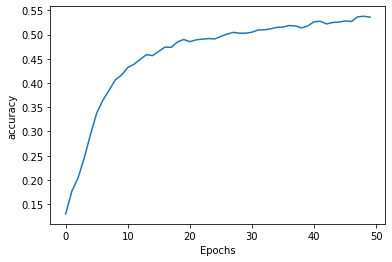

In [31]:
plot_graphs(history, 'accuracy')


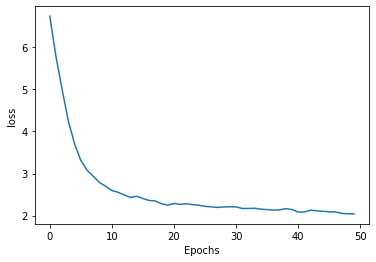

In [32]:
plot_graphs(history, 'loss')


In [78]:
def predict_words(sent, words):
    output_word = []

    # for num_word in range(words):
    token_list = tokenizer.texts_to_sequences([sent])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list)
    predicted = np.squeeze(predicted)

    # preds = np.argsort(predicted)

    # pred = preds[(num_word+1)*-1]

    # for word, index in tokenizer.word_index.items():
    #   if index == pred:
    #     output_word.append(word)
    #     break

    p = np.argmax(predicted)

    output_word = list(tokenizer.word_index.keys())[
        list(tokenizer.word_index.values()).index(p)]
    if words == 0:
        return
    print(sent)
    predict_words(sent+' '+output_word, words-1)

    return 'Done'


In [85]:
predict_words("I am in", 4)


1/1 [==============================] - 0s 38ms/step
I am in
1/1 [==============================] - 0s 33ms/step
I am in the
1/1 [==============================] - 0s 33ms/step
I am in the inner
1/1 [==============================] - 0s 36ms/step
I am in the inner circle
1/1 [==============================] - 0s 32ms/step


'Done'